In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.8.0+cu126
2.8.0+cu126


In [2]:
import io
import os
import tarfile
import tempfile
!pip install boto3
import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset
#Loading file
file_paths = ['/content/1.m4a','/content/2.m4a','/content/3.m4a','/content/4.m4a']

audio_data = []

for file_path in file_paths:
  waveform, sample_rate = torchaudio.load(file_path)
  audio_data.append((waveform, sample_rate))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.2 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

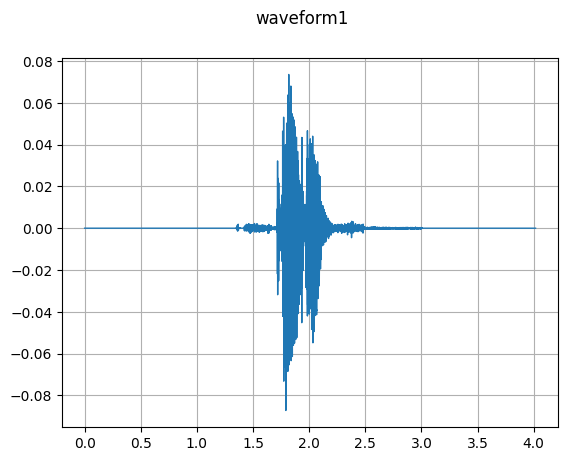

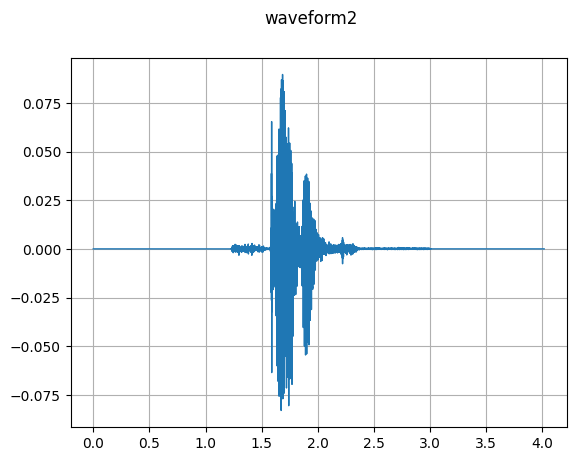

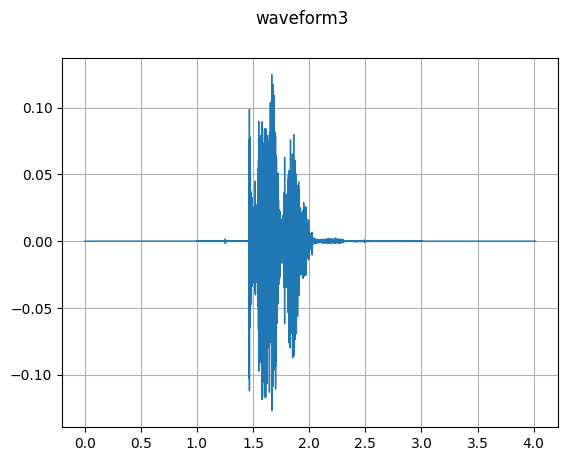

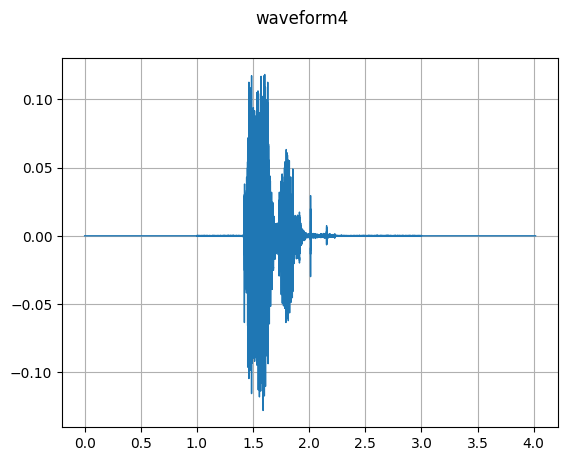

In [13]:
#Waveform
num=1
def plot_waveform(waveform, sample_rate,title="waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title + str(num))

for data in audio_data:
  waveform, sample_rate = data
  plot_waveform(waveform, sample_rate)
  num+=1

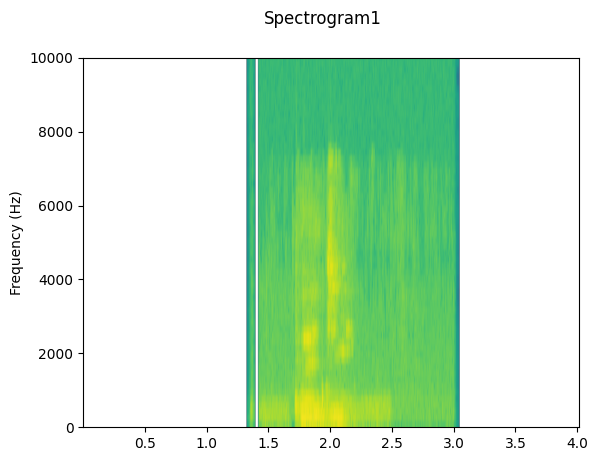

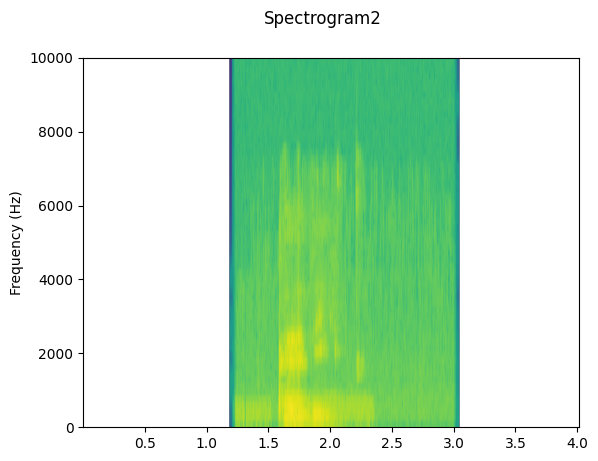

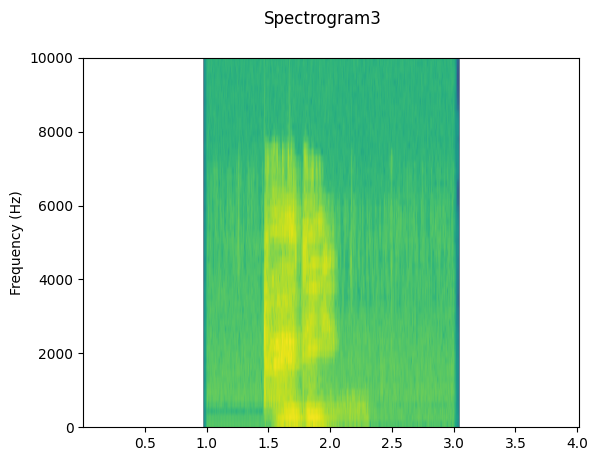

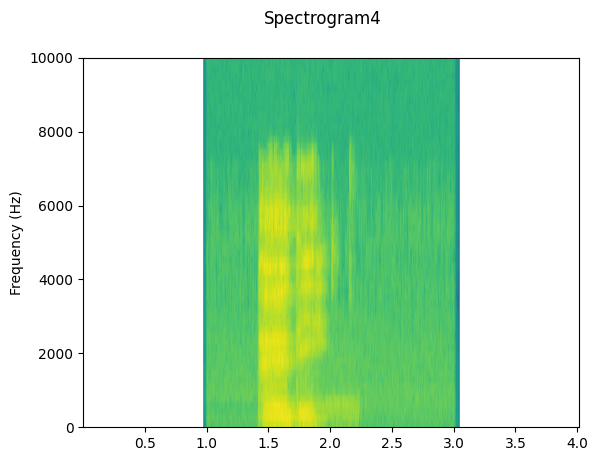

In [17]:
#Specgram
num=1
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        axes[c].set_ylabel("Frequency (Hz)") # y축 레이블 추가
        axes[c].set_ylim(0, 10000) # y축 범위를 0~10000Hz로 고정
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title + str(num))

for data in audio_data:
  waveform, sample_rate = data
  plot_specgram(waveform, sample_rate)
  num+=1

1 Original Sample Rate: 44100 Hz
1 Original Shape (채널, 샘플 수): torch.Size([1, 177152])

1 Upsampled Sample Rate: 96000 Hz
1 Upsampled Shape (채널, 샘플 수): torch.Size([1, 385637])

1 Downsampled Sample Rate: 16000 Hz
1 Downsampled Shape (채널, 샘플 수): torch.Size([1, 64273])
----------------------------------------
----------------------------------------
2 Original Sample Rate: 44100 Hz
2 Original Shape (채널, 샘플 수): torch.Size([1, 177152])

2 Upsampled Sample Rate: 96000 Hz
2 Upsampled Shape (채널, 샘플 수): torch.Size([1, 385637])

2 Downsampled Sample Rate: 16000 Hz
2 Downsampled Shape (채널, 샘플 수): torch.Size([1, 64273])
----------------------------------------
----------------------------------------
3 Original Sample Rate: 44100 Hz
3 Original Shape (채널, 샘플 수): torch.Size([1, 177152])

3 Upsampled Sample Rate: 96000 Hz
3 Upsampled Shape (채널, 샘플 수): torch.Size([1, 385637])

3 Downsampled Sample Rate: 16000 Hz
3 Downsampled Shape (채널, 샘플 수): torch.Size([1, 64273])
-----------------------------------

/tmp/ipython-input-4086239819.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure, axes = plt.subplots(num_channels, 1)


----------------------------------------
----------------------------------------


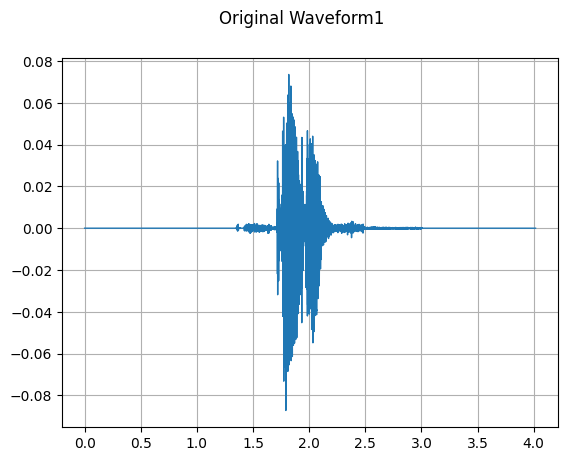

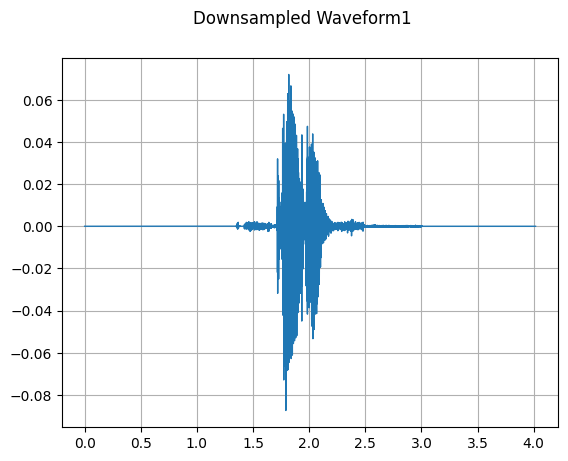

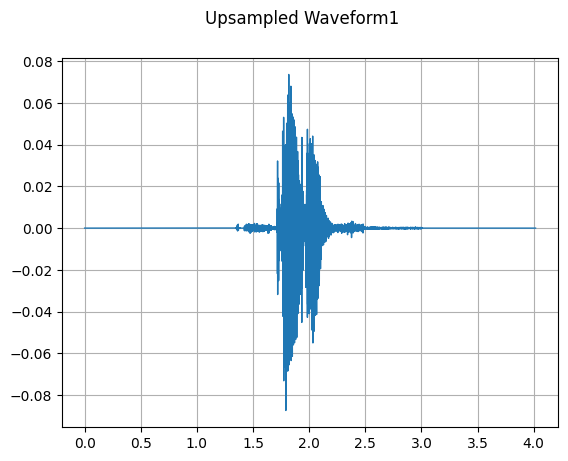

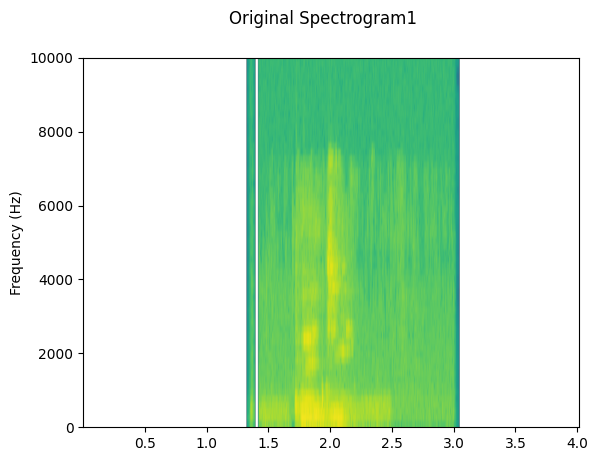

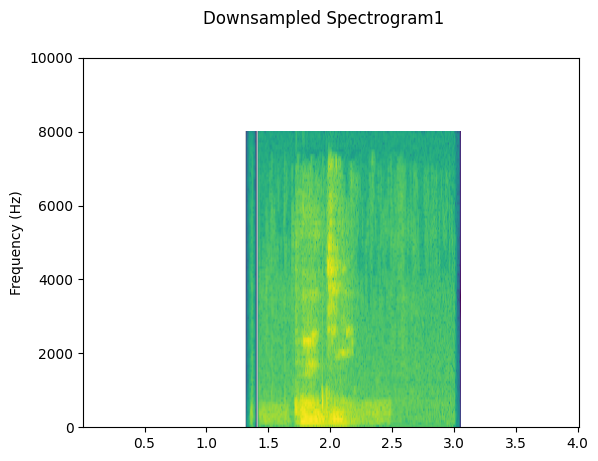

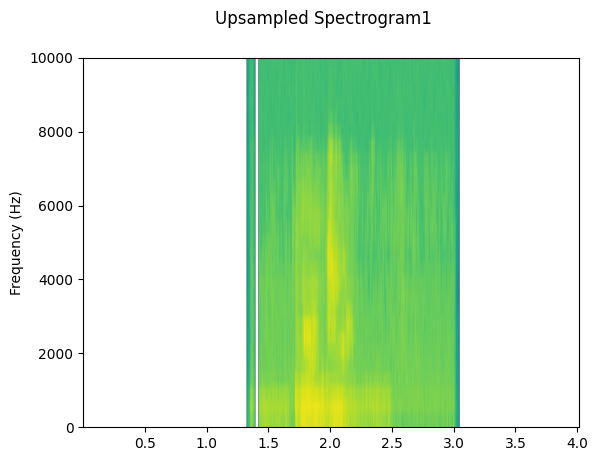

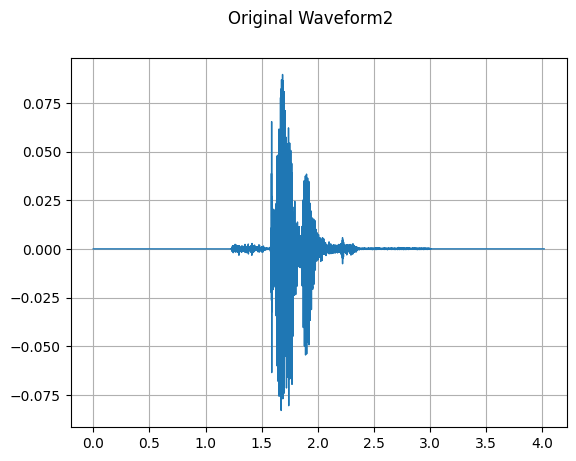

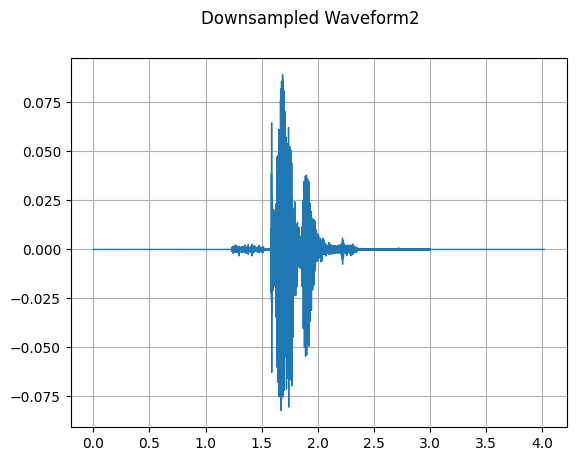

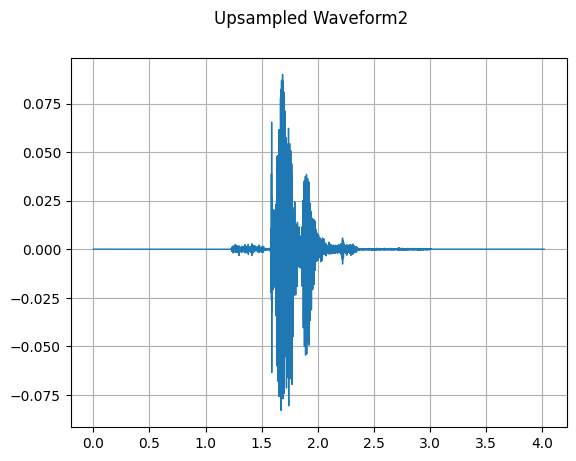

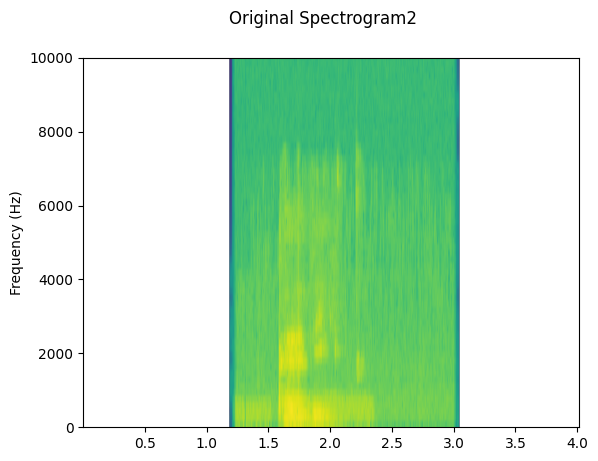

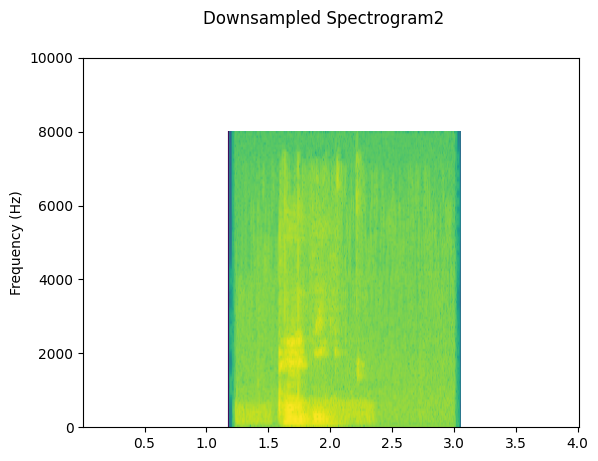

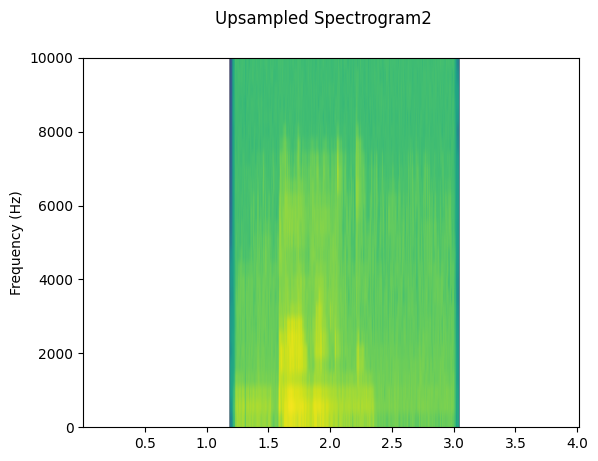

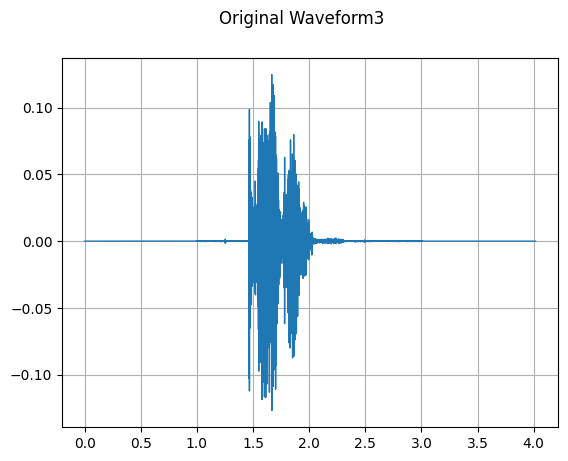

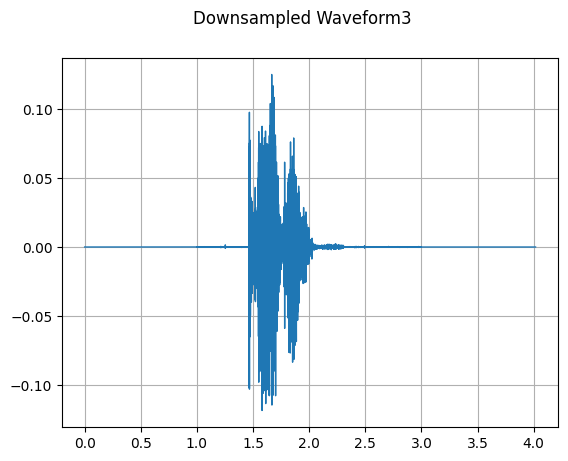

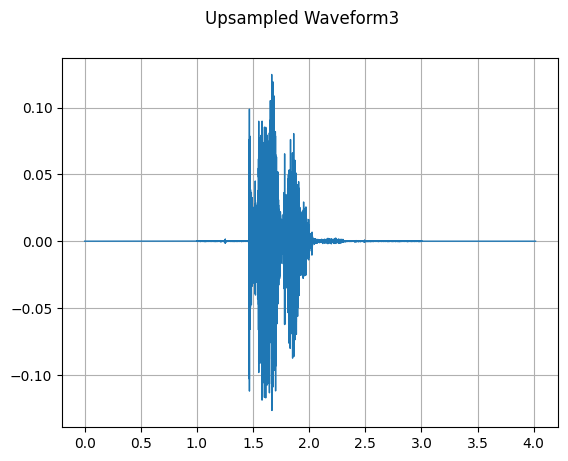

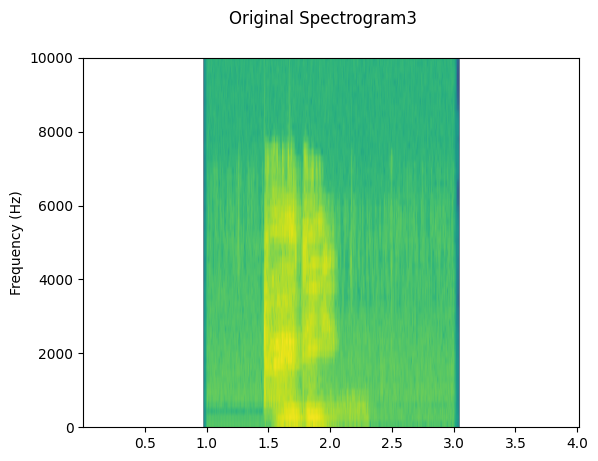

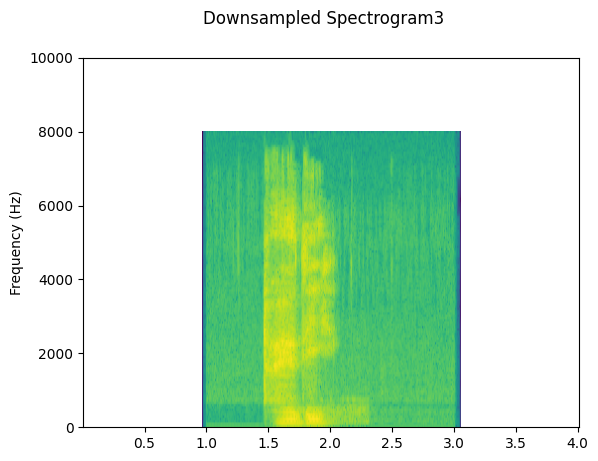

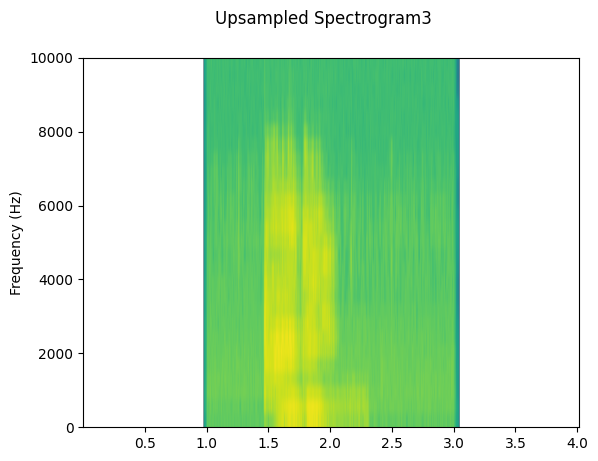

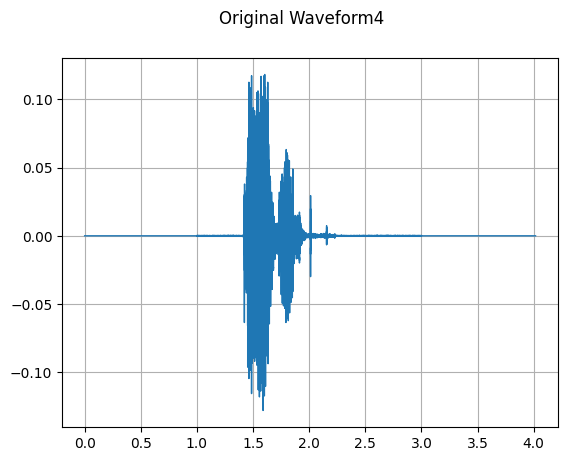

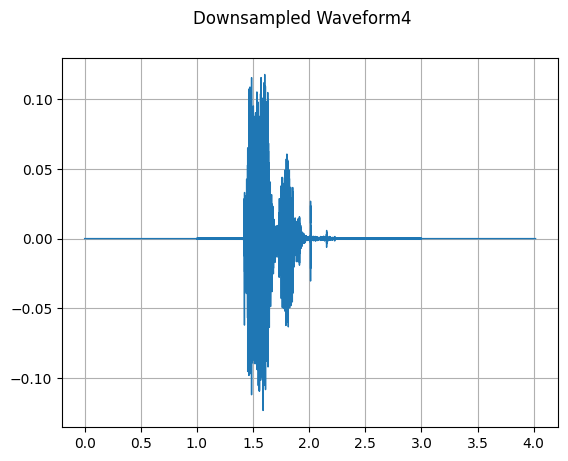

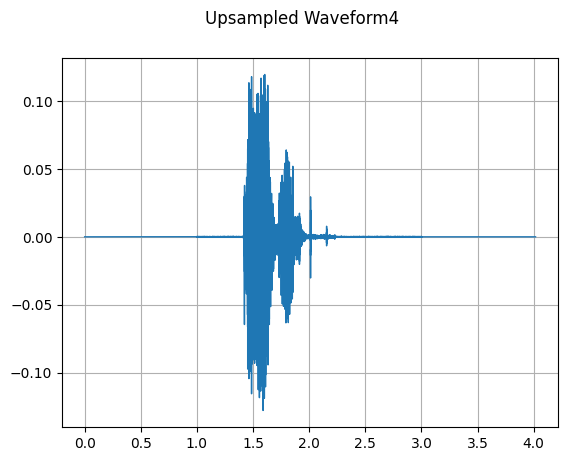

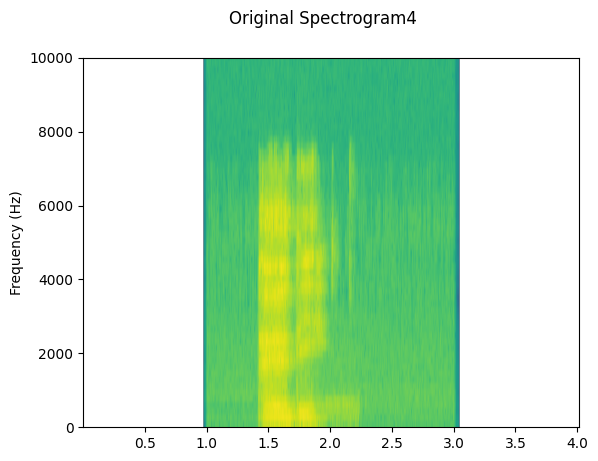

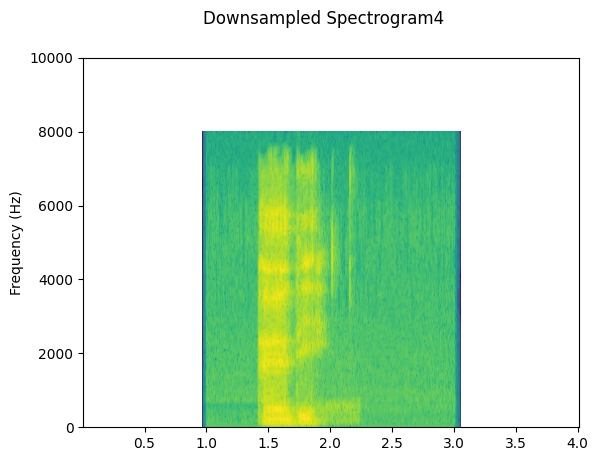

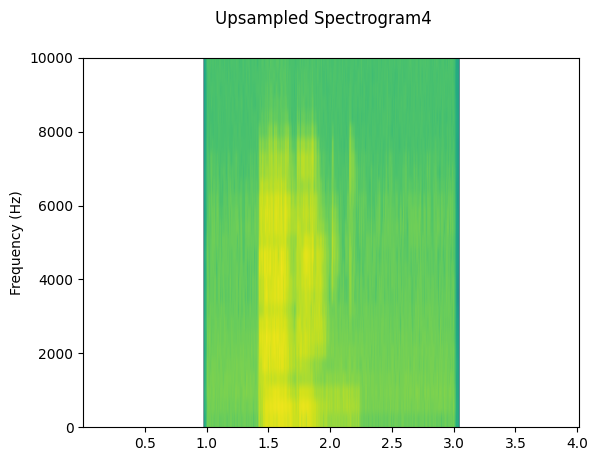

In [18]:
num = 1
for ad_dt in audio_data:
  #Up, down sampling
  original_waveform , original_samplerate = ad_dt
  print(f"{num} Original Sample Rate: {original_samplerate} Hz")
  print(f"{num} Original Shape (채널, 샘플 수): {original_waveform.shape}")

  new_up_samplerate = 96000
  upsampler = torchaudio.transforms.Resample(orig_freq=original_samplerate, new_freq=new_up_samplerate)
  upsampled_waveform = upsampler(original_waveform)
  print(f"\n{num} Upsampled Sample Rate: {new_up_samplerate} Hz")
  print(f"{num} Upsampled Shape (채널, 샘플 수): {upsampled_waveform.shape}")

  new_down_samplerate = 16000
  downsampler = torchaudio.transforms.Resample(orig_freq=original_samplerate, new_freq=new_down_samplerate)
  downsampled_waveform = downsampler(original_waveform)
  print(f"\n{num} Downsampled Sample Rate: {new_down_samplerate} Hz")
  print(f"{num} Downsampled Shape (채널, 샘플 수): {downsampled_waveform.shape}")

  #Visualization
  plot_waveform(original_waveform, original_samplerate, title="Original Waveform")
  plot_waveform(downsampled_waveform, new_down_samplerate, title="Downsampled Waveform")
  plot_waveform(upsampled_waveform, new_up_samplerate, title="Upsampled Waveform")

  plot_specgram(original_waveform, original_samplerate, title="Original Spectrogram")
  plot_specgram(downsampled_waveform, new_down_samplerate, title="Downsampled Spectrogram")
  plot_specgram(upsampled_waveform, new_up_samplerate, title="Upsampled Spectrogram")
  print("-"*40)
  print("-"*40)
  num+=1